In [1]:
from tensorflow.keras.applications.efficientnet import EfficientNetB0
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from PIL import Image

2023-07-31 08:25:34.346080: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-31 08:25:34.813709: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-31 08:25:34.815628: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-31 08:25:41.351033: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
base_dir = "../data"

# List of vitamin folders
vitamin_folders = ["Vitamin_A", "Vitamin_B", "Vitamin_C", "Vitamin_E", "Vitamin_K"]

# Set the output base directory in the Colab disk space
preprocess_dir = './../output/resolution_260'

In [3]:
import os

vitamin_folders = ['Vitamin_A', 'Vitamin_B', 'Vitamin_C', 'Vitamin_E', 'Vitamin_K']

image_files = []

for folder in vitamin_folders:
    folder_path = os.path.join(base_dir, folder)
    image_files.extend([os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.jpg')])


In [4]:
import cv2

num_images = len(image_files)
print("Number of images:", num_images)

# Assuming all images have the same shape
sample_image = cv2.imread(image_files[0])
image_shape = sample_image.shape
print("Image shape:", image_shape)

Number of images: 3172
Image shape: (4032, 3024, 3)


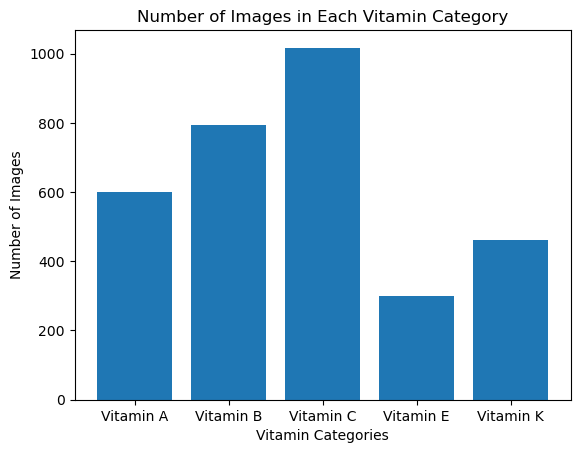

In [5]:
import matplotlib.pyplot as plt

vitamin_labels = ['Vitamin A', 'Vitamin B', 'Vitamin C', 'Vitamin E', 'Vitamin K']
image_counts = [len([file for file in image_files if folder in file]) for folder in vitamin_folders]

plt.bar(vitamin_labels, image_counts)
plt.xlabel('Vitamin Categories')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Vitamin Category')
plt.show()

In [6]:

import numpy as np

# Preprocess the images of a folder
def process_images(folder_name):
    # Set the path to the folder containing the images
    folder_path = os.path.join(base_dir, folder_name)

    # Get a list of all image files in the folder
    image_files = os.listdir(folder_path)

    # Initialize counters
    num_images = len(image_files)
    processed_images = 0

    # Loop through each image file
    for file_name in image_files:
        # Construct the full path to the image file
        image_path = os.path.join(folder_path, file_name)

        # Open the image using PIL
        image = Image.open(image_path)

        # Resize the image to a specific size (e.g., 260x260)
        target_size = (260, 260)
        image = image.resize(target_size)

        # Convert the image to a NumPy array
        image_array = np.array(image)

        # Normalize the pixel values to [0, 1]
        image_array = image_array / 255.0

        # Convert the NumPy array back to PIL Image
        image = Image.fromarray((image_array * 255).astype(np.uint8))

        # Save the preprocessed image with a new file name
        output_folder = os.path.join(preprocess_dir, folder_name)
        os.makedirs(output_folder, exist_ok=True)
        output_path = os.path.join(output_folder, file_name)
        image.save(output_path)

        # Update the counter
        processed_images += 1

    print(f"Done! Number of images processed in {folder_name}: {processed_images}/{num_images}")

In [7]:
# import concurrent.futures

# # Create a ThreadPoolExecutor with maximum concurrent threads
# with concurrent.futures.ThreadPoolExecutor(max_workers=len(vitamin_folders)) as executor:
#     # Submit image processing tasks for each folder concurrently
#     futures = [executor.submit(process_images, folder_name) for folder_name in vitamin_folders]

#     # Wait for all tasks to complete
#     concurrent.futures.wait(futures)

for folder in vitamin_folders:
    process_images(folder)

Done! Number of images processed in Vitamin_A: 600/600
Done! Number of images processed in Vitamin_B: 795/795
Done! Number of images processed in Vitamin_C: 1017/1017
Done! Number of images processed in Vitamin_E: 299/299
Done! Number of images processed in Vitamin_K: 461/461


In [8]:
preprocess_files = []

for folder in vitamin_folders:
    folder_path = os.path.join(preprocess_dir, folder)
    preprocess_files.extend([os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.jpg')])

num_preprocess_images = len(preprocess_files)
print("Number of pre-processed images:", num_images)

# Assuming all images have the same shape
sample_image = cv2.imread(image_files[0])
image_shape = sample_image.shape
print("Image shape:", image_shape)

if num_preprocess_images == num_images:
  print("\nAll the images pre-processed successfully 🎉")

Number of pre-processed images: 3172
Image shape: (4032, 3024, 3)

All the images pre-processed successfully 🎉


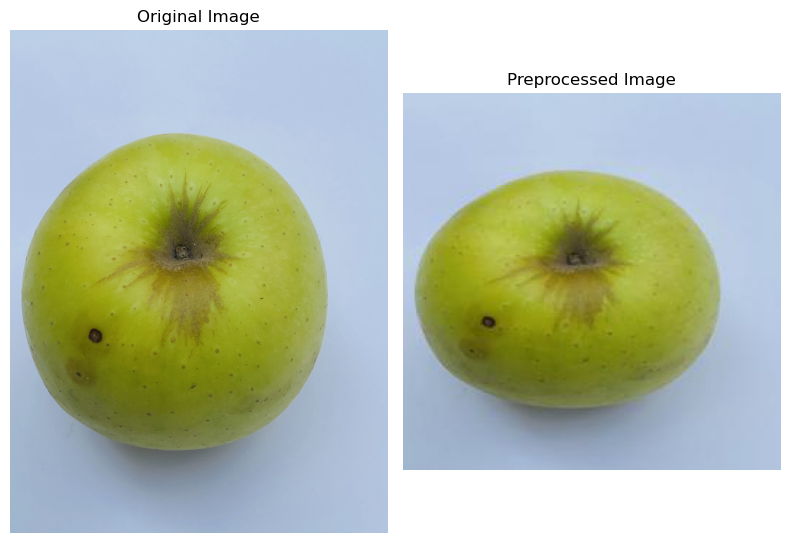

In [9]:
# Load the original image
original_image = Image.open(os.path.join(base_dir, "Vitamin_A", "1.jpg"))

# Visualize the original image
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(original_image)
plt.axis('off')

# pre processed image
preprocessed_image = Image.open(os.path.join(preprocess_dir, "Vitamin_A", "1.jpg"))

# Visualize the preprocessed image
plt.subplot(1, 2, 2)
plt.title("Preprocessed Image")
plt.imshow(preprocessed_image)
plt.axis('off')

plt.tight_layout()
plt.show()